In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import numpy as np
from tensorflow.python.client import device_lib
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# 查看图片

(224, 224, 3)


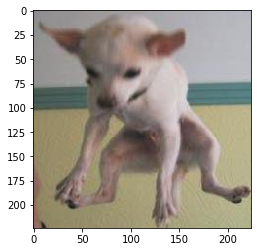

In [5]:
I = mpimg.imread('C:\\Users\\71801\\python_ml\\dogs_breed\\cropped\\train\\n02085620-Chihuahua\\n02085620_10621.jpg')
print (I.shape)
plt.imshow(I)

# 数据所在路径

In [5]:
trainSetPath='C:\\Users\\71801\\python_ml\\dogs_breed\\cropped\\train\\'
validationSetPath='C:\\Users\\71801\\python_ml\\dogs_breed\\cropped\\test\\'

## 训练集batch数据读取、预处理

In [19]:
# 可以使用它在batch中对数据进行增强，扩充数据集大小，从而增强模型的泛化能力
train_datagen = ImageDataGenerator(rescale=1./255,  
                                   shear_range=0.2, #剪切强度（逆时针方向的剪切变换角度）
                                   horizontal_flip=True)

# 函数flow_from_diectory从文件夹中读取图像
train_generator = train_datagen.flow_from_directory(directory=trainSetPath, 
                                                    target_size=(150, 150), 
                                                    batch_size=64)

Found 12000 images belonging to 120 classes.


## 验证集batch数据读取、预处理

In [20]:
# 可以使用它在batch中对数据进行增强，扩充数据集大小，从而增强模型的泛化能力
valid_datagen = ImageDataGenerator(rescale=1./255)

# 函数flow_from_diectory从文件夹中读取图像
valid_generator = valid_datagen.flow_from_directory(directory=validationSetPath, 
                                                    target_size=(150, 150), 
                                                    batch_size=64)

Found 8580 images belonging to 120 classes.


# 定义网络结构

In [8]:
class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,              # 卷积层神经元（卷积核）数目
            kernel_size=[5, 5],     # 感知域大小（滤波器大小） padding=2
            strides=(2,2),
            padding='same',         # padding策略（vaild 或 same）same保证卷出来的图大小与原输入相同
            kernel_initializer=tf.random_normal_initializer,
            activation=tf.nn.relu   # 激活函数
        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2],strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            strides=(1,1),
            padding='same',
            kernel_initializer=tf.random_normal_initializer,
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2],strides=2)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(rate=0.1)
        self.dense2 = tf.keras.layers.Dense(units=120)
 
    def call(self, inputs):                     # [batch_size, 150, 150, 1] 
        x = self.conv1(inputs)                  # [batch_size, 75, 75, 32] 
        x = self.pool1(x)                       # [batch_size, 37, 37, 64]
        x = self.conv2(x)                       # [batch_size, 19, 19, 64]
        x = self.pool2(x)                       # [batch_size, 9, 9, 64]
        x = self.flatten(x)                      # [batch_size, 9*9*64=5184]
        x = self.dense1(x)                      # [batch_size, 512]
        x = self.dropout(x)                     
        x = self.dense2(x)                      # [batch_size, 120]
        output = tf.nn.softmax(x)
        return output

# 实例化网络、编译模型、拟合模型

In [21]:
model = CNN()

In [22]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,# 分类的交叉熵损失 #loss传值有三种方式
             optimizer=tf.keras.optimizers.Adam(),# 随机梯度下降
             metrics=['accuracy'])

In [27]:
model.fit(train_generator, 
          steps_per_epoch=None, 
          epochs=20, 
          validation_data=valid_generator, 
          validation_steps=None, 
          validation_freq=1,
          class_weight=None,
          max_queue_size=10, 
          workers=1, 
          use_multiprocessing=False,
          shuffle=True, 
          initial_epoch=0)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 188 steps, validate for 135 steps
Epoch 1/20
188/188 [==============================] - 53s 282ms/step - loss: 0.1620 - accuracy: 0.9588 - val_loss: 10.6220 - val_accuracy: 0.0970
Epoch 2/20
188/188 [==============================] - 53s 281ms/step - loss: 0.1645 - accuracy: 0.9568 - val_loss: 10.2639 - val_accuracy: 0.1005
Epoch 3/20
188/188 [==============================] - 52s 279ms/step - loss: 0.1373 - accuracy: 0.9649 - val_loss: 10.7554 - val_accuracy: 0.0991
Epoch 4/20
188/188 [==============================] - 53s 281ms/step - loss: 0.1445 - accuracy: 0.9613 - val_loss: 10.9586 - val_accuracy: 0.0990
Epoch 5/20
188/188 [==============================] - 51s 274ms/step - loss: 0.1236 - accuracy: 0.9674 - val_loss: 11.2445 - val_accuracy: 0.1001
Epoch 6/20
188/188 [==============================] - 51s 273ms/step - loss: 0.1064 - accuracy: 0.9717 - val_loss: 11.5618 - val_accuracy: 0.1003
Epoch 7/20
188/188 [==========